In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

/Users/elenaefimova/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [110]:
df = pd.read_csv('economics.csv', parse_dates=True)

In [117]:
df['Вид'].unique

<bound method Series.unique of 0     растениеводство и животноводство, охота и пред...
1                           лесоводство и лесозаготовки
2                             рыболовство и рыбоводство
3                                           добыча угля
4                        добыча нефти и природного газа
5                              добыча металлических руд
6                        производство пищевых продуктов
7                                 производство напитков
8                         производство табачных изделий
9                      производство текстильных изделий
10                                  производство одежды
11                  производство кожи и изделий из кожи
12    обработка древесины и производство изделий из ...
13               производство бумаги и бумажных изделий
14        деятельность полиграфическая и копирование...
15                  производство кокса и нефтепродуктов
16        производство химических веществ и химическ...
17        произво

In [103]:
interested_activities = ['образование', 'производство одежды']

In [143]:
data = df[df['Вид'].isin(interested_activities)]
data.head()

,Вид,2017,2018,2019,2020,2021,2022,2023
10,производство одежды,20299,19819,21065,20927,24312,27352,34049
43,образование,30258,34361,37072,39563,43391,48400,54263


In [144]:
data = data.set_index('Вид').transpose()

<AxesSubplot:>

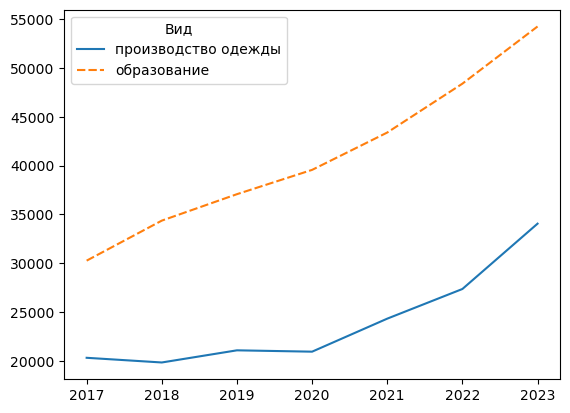

In [145]:
sns.lineplot(data=data)

Средняя заработная плата росла в образовании с 2017 по 2023 гг. В производстве одежды есть небольшое падение в 2018 по сравнению с предыдущим годом и резкое увеличение с 2020 г

In [146]:
infl = pd.read_csv('inflation.csv')

In [149]:
infl_df = infl[['Year', 'Total']]
infl_df.head()

,Year,Total
0,2023,7.42
1,2022,11.92
2,2021,8.39
3,2020,4.91
4,2019,3.05


In [156]:
data = data.reset_index()
data.rename(columns={'index': 'Year'}, inplace=True)

In [168]:
df = data.merge(infl_df[['Total', 'Year']], how='left', on='Year')

In [178]:
df['производство одежды_с инфляцией']= (df['производство одежды'] - df['производство одежды']* df['Total']/100).astype(int)
df['образование_с инфляцией']= (df['образование'] - df['образование']* df['Total']/100).astype(int)

<AxesSubplot:xlabel='Year', ylabel='Средняя зарплата'>

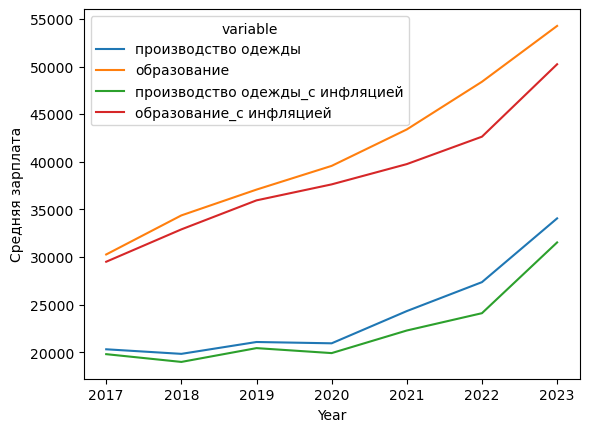

In [197]:
df.drop(columns=['Total'], inplace=True)
s = pd.melt(df, ['Year'])
s.rename(columns={'value': 'Средняя зарплата'}, inplace=True)
sns.lineplot(x='Year', y='Средняя зарплата', hue='variable', data=s)

Реальный рост зарплат ниже. С 2020 года инфляция начинает сильнее влиять на заработные платы. Рост замедляется, и в 2022 году по обоим видам заметен большой разрыв между реальным уровнем зп и номинальным. После 2022 года происходит резкий рост, где разрыв начинает уменьшаться